<img src="logo_UCLA_blue_boxed.svg" alt="ucla logo" width="150" align="left"/>

### **MAE 150A - Intermediate Fluid Mechanics**

<hr />

# Normal shocks
This notebook demonstrates the use of the compressible tools for dealing with **normal shock waves**.

In [1]:
include("src/gasdynamics.jl")

In [2]:
using Plots
using LaTeXStrings

### General use of normal shock relations

Normal shock relations are designated with the argument `NormalShock`. For example, let's look at the ratio of stagnation pressures $p_{02}/p_{01}$ across a normal shock with the Mach number $M_1$ entering the shock equal to 2:

In [11]:
p02_over_p01 = StagnationPressureRatio(MachNumber(2),NormalShock)

StagnationPressureRatio = 0.720874 

and the density $\rho_2/\rho_1$ increases by the factor:

In [6]:
ρ2_over_ρ1 = DensityRatio(MachNumber(2),NormalShock)

DensityRatio = 2.66667 

What is the entropy change across this shock?

In [7]:
s2_minus_s1 = Entropy(Entropy(0),MachNumber(2),NormalShock)

Entropy = 93.9325 JPerKGK

Let's plot the entropy increase as a function of Mach number:

In [8]:
M1 = range(1,3,length=101)
s2 = []
pratio = []
for M in M1
    push!(s2,value(Entropy(Entropy(0),MachNumber(M),NormalShock)))
    push!(pratio,value(PressureRatio(MachNumber(M),NormalShock)))
end

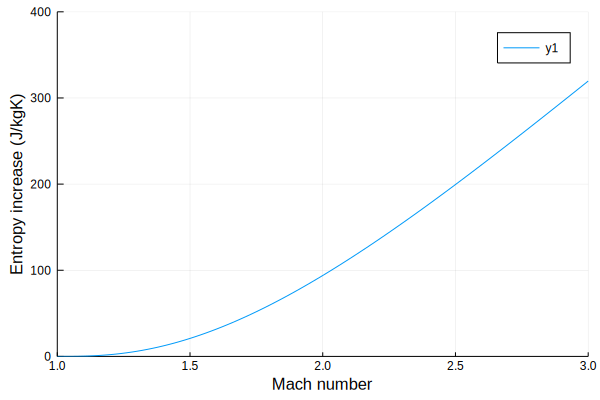

In [10]:
plot(M1,s2,xlim=(1,3),ylim=(0,400),xlabel="Mach number",ylabel="Entropy increase (J/kgK)")

Not surprisingly, the entropy jump gets bigger as the Mach number increases

### Example 8.6 in Wilcox
For air entering a shock at Mach number 3, 1 atm, and 50 degrees F, what are the Mach number, pressure, and temperature on the other side of the shock?

In [12]:
p1 = Pressure(1,units=atm)
M1 = MachNumber(3)
T1 = Temperature(50,units=F)

Temperature = 283.15 Kelvin

The Mach number exiting the shock is

In [13]:
M2 = MachNumber(M1,NormalShock)

MachNumber = 0.475191 

Pressure exiting the shock (in atm) is

In [14]:
p2 = Pressure(p1*PressureRatio(M1,NormalShock))
value(p2,atm)

10.333333333333334

and the temperature exiting the shock (in F) is

In [15]:
T2 = Temperature(T1*TemperatureRatio(M1,NormalShock))
value(T2,F)

905.7422222222218

### Example 8.9 in Wilcox
A blow-down supersonic windtunnel is supplied with air from a large reservoir. A Pitot tube is placed at the exit plane of a converging-diverging nozzle. The test section lies at the end of the diverging section. The Mach number in the test section (M2) is 2 and the pressure is below atmospheric, so a shock is formed at the exit. The pressure just after the shock (p3) is 14.7 psi. Find the pressure in the reservoir (p01), the pressure in the throat (pth), the Mach number just after the shock (M3), the pressure at the Pitot tube (p4), and the temperature at the Pitot tube (T4).

In [16]:
M2 = MachNumber(2)
p3 = Pressure(14.7,units=psi)

Pressure = 101353.0 Pascals

First, let's find the pressure just before the shock and the Mach number just after the shock

In [18]:
# p3/p2
p3_over_p2 = PressureRatio(M2,NormalShock)

# p03/p02
p03_over_p02 = StagnationPressureRatio(M2,NormalShock)

# M3
M3 = MachNumber(M2,NormalShock)

MachNumber = 0.57735 

We can now calculate the pressure just before the shock, using $p_2 = p_3/(p_3/p_2)$

In [19]:
p2 = Pressure(p3/p3_over_p2)

Pressure = 22522.9 Pascals

Now, let's find the conditions in the throat and reservoir, based on what we have been given here. We can immediately find the stagnation pressure upstream of the shock using the isentropic relation. This stagnation pressure is the same as the reservoir pressure. 

In [22]:
p02 = StagnationPressure(p2,M2,Isentropic)
p01 = p02

StagnationPressure = 176229.0 Pascals

We know that the throat is choked. It must be, because the flow is subsonic before and supersonic after the throat. Therefore, $M_{th}$ is 1, and we can get the local pressure ($p_{th}$) from knowing the stagnation pressure and Mach number there:

In [24]:
Mth = MachNumber(1)
p0th = p02
pth = Pressure(p0th,Mth,Isentropic)

Pressure = 93098.6 Pascals

Now we can calculate the conditions at the Pitot tube at the exit. At the nose of the Pitot tube, the flow stagnates. Thus, the pressure and temperature are equal to the stagnation values. The stagnation pressure at the exit is the same as the stagnation pressure at point 3 (just after the shock):

In [25]:
p03 = Pressure(p03_over_p02*p02)

Pressure = 127039.0 Pascals

In [26]:
value(p03,psi)

18.425439988556167